<h1 align="center">Computational Methods in Environmental Engineering</h1>
<h2 align="center">Lecture #21</h2>
<h3 align="center">11 May 2023</h3>



## Geospatial data and processing



-   Python offers many libraries for handling geospatial data
-   We briefly covered `geopandas`, `geoviews`, and `xarray`
-   But there's more



In [1]:
%conda install -c conda-forge rasterio rioxarray contextily rasterstats

Let's import some modules



In [1]:
import rioxarray as rx
import rasterio as rio
import xarray as xr
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

## Let's load a dataset



The data and workflow are adapted from a [Scipy tutorial](https://github.com/pysal/scipy2019-intermediate-gds)



In [2]:
nl_file = rio.open("../data/txlights.tif")
nl_file.crs

CRS.from_epsg(4326)

Reading the actual data



In [3]:
nightlights = nl_file.read(1)
nightlights.shape

(1277, 1577)

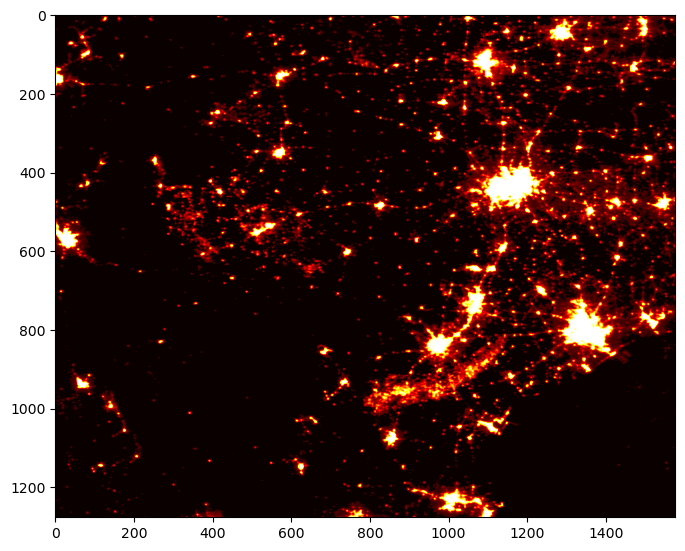

In [4]:
fig = plt.figure(figsize=(8, 8))
ax  = fig.add_subplot(1, 1, 1)
ax.imshow(nightlights, cmap='hot')

### What about coordinates?



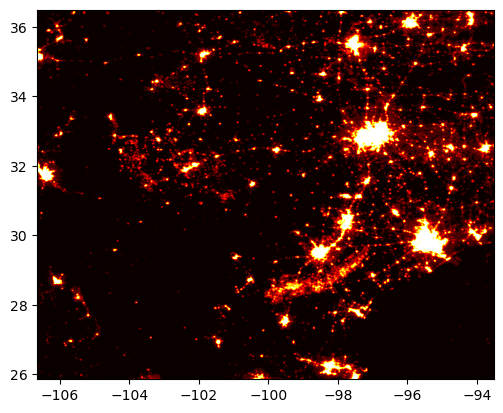

<AxesSubplot:>

In [5]:
from rasterio import plot as rioplot
rioplot.show(nl_file, cmap='hot')

To use `matplotlib` we need an explicit `extent`



In [6]:
nl_file.bounds

BoundingBox(left=-106.6495132446289, bottom=25.852210786788664, right=-93.5078466305289, top=36.493877410888665)

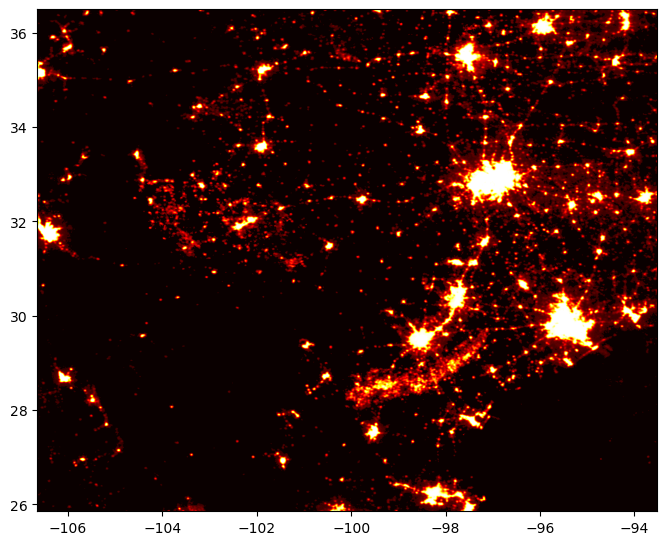

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
nl_extent = np.asarray(nl_file.bounds)[[0, 2, 1, 3]]
ax.imshow(nightlights, cmap='hot', extent=nl_extent)

## Subsetting and clipping rasters



-   We can use a bounding box to subset a raster
-   This can also come from a vector file



In [8]:
neighborhoods = gp.read_file('../data/neighbourhoods.geojson')
bbox = neighborhoods.total_bounds
bbox

array([-98.071453,  30.068439, -97.541566,  30.521356])

In [9]:
neighborhoods

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."
5,78747,None,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ..."
6,78751,None,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ..."
7,78712,None,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ..."
8,78738,None,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ..."
9,78725,None,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ..."


<AxesSubplot:>

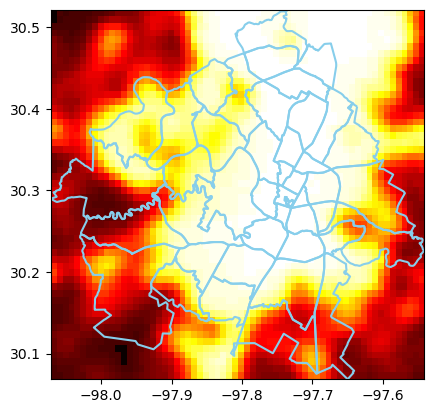

In [10]:
austin_window = nl_file.window(*bbox)
austin_nightlights = nl_file.read(1, window=austin_window)
plt.imshow(austin_nightlights, extent=bbox[[0, 2, 1, 3]], cmap='hot')
neighborhoods.boundary.plot(ax=plt.gca(), color='skyblue')

## Writing rasters



We need a couple of additional things apart from the data!



-   Raster dimensions
-   Number of bands
-   Data type
-   Coordinate system
-   Affine transformation



In [11]:
geo_transform = nl_file.window_transform(austin_window)
geo_transform

Affine(0.0083333333, 0.0, -98.071453,
       0.0, -0.0083333333, 30.521356000000004)

In [15]:
with rio.open("../data/austinlights.tif",
                   'w',
                   driver='GTiff',
                   height=austin_nightlights.shape[0],
                   width=austin_nightlights.shape[1],
                   count=1,
                   dtype=rio.ubyte,
                   crs=nl_file.crs,
                   transform=geo_transform) as outfile:
    outfile.write(austin_nightlights, indexes=1)

In [16]:
!gdalinfo ../data/austinlights.tif

Driver: GTiff/GeoTIFF
Files: ../data/austinlights.tif
Size is 64, 54
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
   

## Zonal statistics



-   Calculating statistics by overlaying raster map with vector features
-   **Example**: Intersects map of annual precipitation with county boundaries



In [17]:
import rasterstats

In [18]:
rasterstats.zonal_stats(neighborhoods.geometry.head(), austin_nightlights,
                        affine=geo_transform)

/home/kandread/Documents/Teaching/2023/cee597/.venv/lib/python3.10/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


[{'min': 14.0, 'max': 60.0, 'mean': 40.71111111111111, 'count': 45},
 {'min': 52.0, 'max': 63.0, 'mean': 60.104166666666664, 'count': 48},
 {'min': 39.0, 'max': 59.0, 'mean': 51.21052631578947, 'count': 57},
 {'min': 6.0, 'max': 60.0, 'mean': 23.623456790123456, 'count': 162},
 {'min': 63.0, 'max': 63.0, 'mean': 63.0, 'count': 6}]

Can use custom function too!



In [19]:
from scipy.stats import skew

def flatskew(x):
    return skew(x.data, axis=None)

In [20]:
rasterstats.zonal_stats(neighborhoods.geometry.head(), austin_nightlights,
                        affine=geo_transform, stats=' ',
                        add_stats=dict(skew=flatskew))

/tmp/ipykernel_2883191/2680526120.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return skew(x.data, axis=None)


[{'skew': -0.4035450173598304},
 {'skew': -2.213327025178917},
 {'skew': -1.2083938615469019},
 {'skew': 0.743100302125721},
 {'skew': nan}]

## Reprojecting



We will use data from [Earth Lab](https://www.earthdatascience.org/)



In [24]:
lidar_dem_file = "../data/pre_DTM.tif"
lidar_dem = rx.open_rasterio(lidar_dem_file, masked=True)
lidar_dem

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

Let's get rid of the `band` dimension



In [25]:
lidar_dem = lidar_dem.squeeze()
lidar_dem

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

There's a [way to do this in rasterio](https://rasterio.readthedocs.io/en/stable/topics/reproject.html) but&#x2026;



In [26]:
dst_crs = 'EPSG:3857'
rp_lidar_dem = lidar_dem.rio.reproject(dst_crs)
rp_lidar_dem

<xarray.DataArray (y: 2020, x: 4004)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x            (x) float64 -1.173e+07 -1.173e+07 ... -1.172e+07 -1.172e+07
  * y            (y) float64 4.877e+06 4.877e+06 ... 4.874e+06 4.874e+06
    band         int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

Now let's write the new raster



In [27]:
projected_lidar_dem_file = lidar_dem_file.replace(".tif", "_rp.tif")
rp_lidar_dem.rio.to_raster(projected_lidar_dem_file)

Let's verify that everything is correct



In [28]:
lidar_dem2 = rio.open(projected_lidar_dem_file)
print(lidar_dem2.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4004, 'height': 2020, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(1.3063652820083913, 0.0, -11725101.307458913,
       0.0, -1.3063652820081633, 4876690.453258087)}


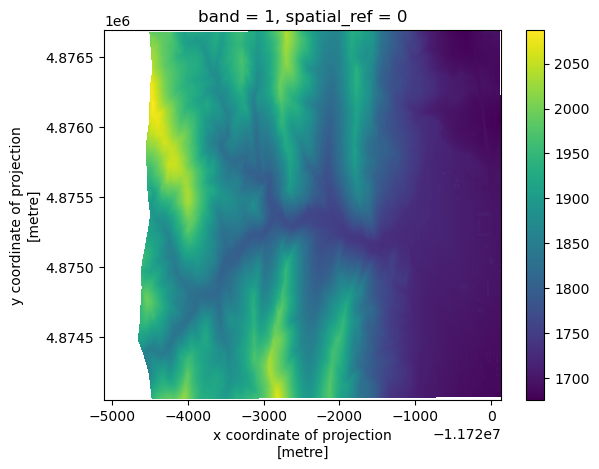

In [30]:
rp_lidar_dem.plot()

## ☛ Hands-on exercise: Exploratory analysis



We will go over a typical workflow example looking at canopy height data



In [44]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from rasterio.plot import plotting_extent

# import seaborn as sns
# sns.set(font_scale=1.5, style="whitegrid")

### Calculate canopy height raster



First load the data from the two files



In [31]:
dtm_filename = "../data/pre_DTM.tif"
dsm_filename = "../data/pre_DSM.tif"
dtm = rx.open_rasterio(dtm_filename, masked=True)
dsm = rx.open_rasterio(dsm_filename, masked=True)

Then calculate canopy heights by subtracting the DTM from the DSM



In [32]:
heights = dsm - dtm
heights

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
array([[[       nan,        nan,        nan, ..., 0.        ,
         0.17004395, 0.960083  ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.09008789, 1.6400146 ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.07995605],
        ...,
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

### Classifying the data



Let's classify our data to

-   No trees
-   Short trees
-   Medium trees
-   Tall trees



Which values should we use for each class?



<div class="org-center">
<p>
<b>Always look at the data!</b>
</p>
</div>



Plot a histogram of the data from the canopy heights to select appropriate values for each class



(array([5.539156e+06, 3.071380e+05, 2.801040e+05, 2.278690e+05,
        1.963080e+05, 1.747000e+05, 1.394000e+05, 1.012930e+05,
        7.208800e+04, 4.990700e+04, 3.232000e+04, 1.863300e+04,
        1.003800e+04, 5.037000e+03, 2.319000e+03, 9.280000e+02,
        3.290000e+02, 1.150000e+02, 3.900000e+01, 7.000000e+00]),
 array([ 0.       ,  1.3465027,  2.6930053,  4.039508 ,  5.3860106,
         6.7325134,  8.079016 ,  9.425519 , 10.772021 , 12.118525 ,
        13.465027 , 14.811529 , 16.158031 , 17.504536 , 18.851038 ,
        20.19754  , 21.544043 , 22.890545 , 24.23705  , 25.583551 ,
        26.930054 ], dtype=float32),
 <BarContainer object of 20 artists>)

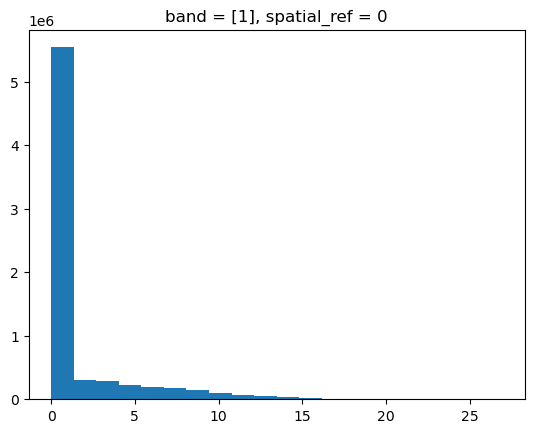

In [33]:
heights.plot.hist(bins=20)

Let's choose some bounds for this class

-   `0-??`: no trees
-   `??-??`: short trees
-   `??-??`: medium trees
-   `> ??`: tall trees



Text(0.5, 1.0, 'Distribution of raster cell values in the DTM difference data')

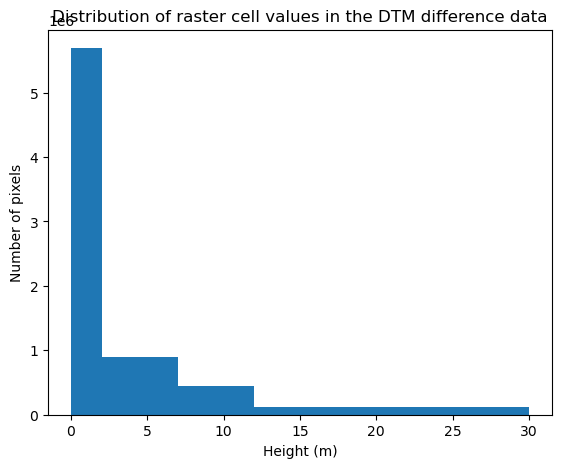

In [34]:
fig = plt.figure(figsize=(6.5, 5))
ax = fig.add_subplot(1, 1, 1)
heights.plot.hist(ax=ax, bins=[0, 2, 7, 12, 30])
ax.set_ylabel("Number of pixels")
ax.set_xlabel("Height (m)")
ax.set_title("Distribution of raster cell values in the DTM difference data")

Use `np.digitize` to map the values to a class



In [39]:
class_bins = [0, 2, 7, 12, 1000]
chm = xr.zeros_like(heights, dtype=np.int32)
chm.data = np.digitize(heights, class_bins)
np.unique(chm.data)

array([1, 2, 3, 4, 5])

Why are there 5 class values? Need to get rid of missing data class!



In [40]:
chm.where?

In [41]:
trees = chm.where(~heights.isnull())
trees

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
array([[[nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

Plot the data



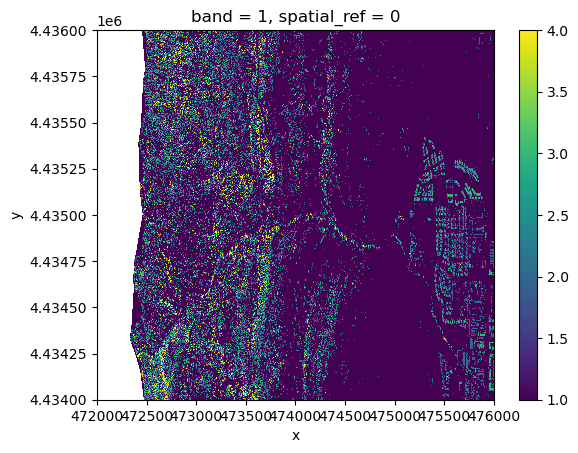

In [42]:
trees.plot()

How about some nicer colors?



In [45]:
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']
cmap = ListedColormap(colors)

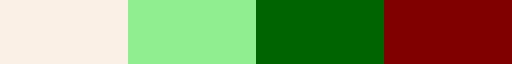

In [46]:
cmap

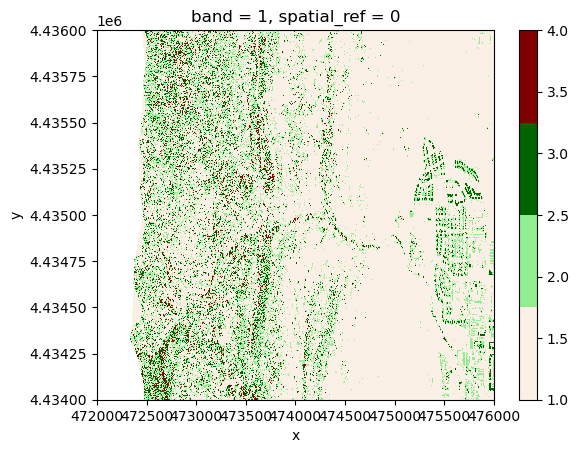

In [47]:
trees.plot(cmap=cmap)

and finally add a proper legend



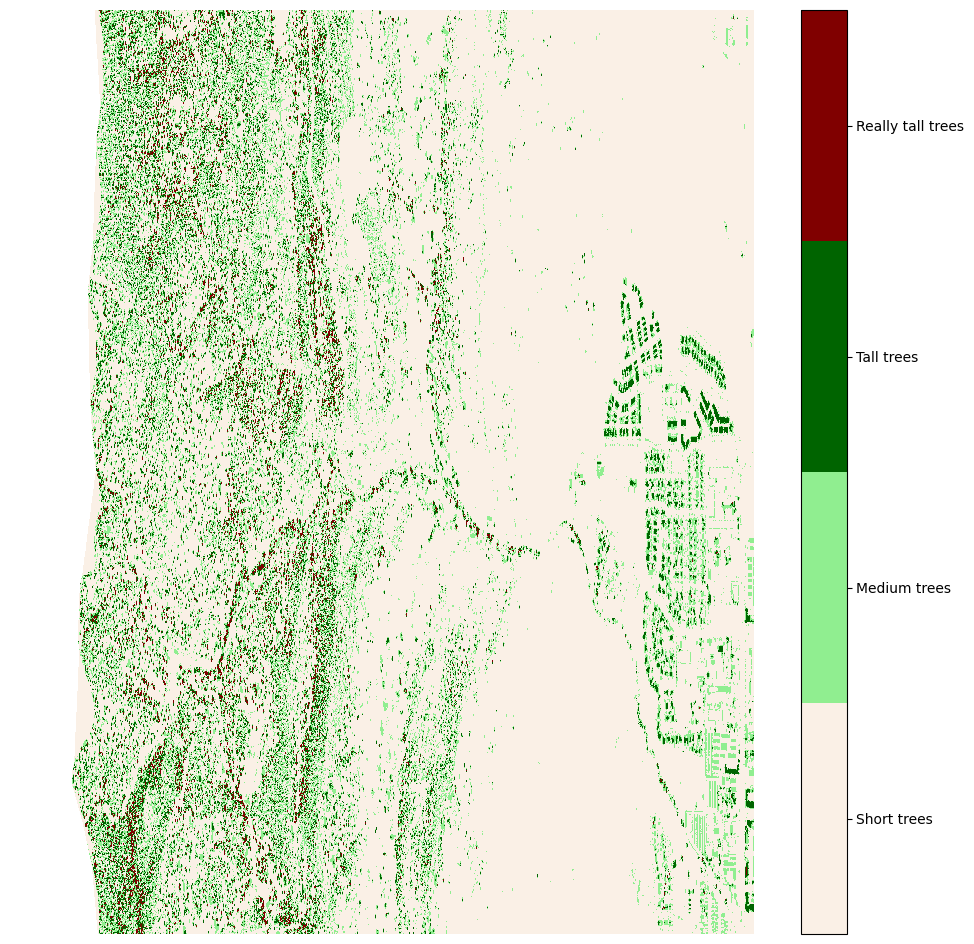

In [48]:
def format_func(x, pos):
    height_class_labels = {1: "Short trees", 2: "Medium trees", 3: "Tall trees", 4: "Really tall trees"}
    return height_class_labels[x]

formatter = plt.FuncFormatter(format_func)

fig, ax = plt.subplots(figsize=(12, 12))
trees.plot(ax=ax, vmin=0.5, vmax=4.5, cmap=cmap, cbar_kwargs={'format': formatter,
                                                                           'spacing': 'proportional',
                                                                           'ticks': np.linspace(1, 4, 4)})
ax.set_title("")
ax.set_axis_off()